Belfiore Asia, CID:02129867

MSc Advanced Computing, Spring Term, January 2025

# **Analysis of Acute Kidney Injury (AKI) Data**

In [1]:
import pandas as pd # add to requirements.txt
import matplotlib.pyplot as plt # add to requirements.txt
import seaborn as sns   # add to requirements.txt
from utils import *

# 1. Load the training data
train_data_path = 'data/training.csv'
header_len = get_longest_row(train_data_path)
test_dates_columns = get_header(header_len, 'train')

creatinine_columns = test_dates_columns.copy()[3:]

train_data = pd.read_csv(train_data_path, sep=',', names=test_dates_columns, skiprows=1)

# get the exam date columns to datetime
exam_dates = {}
for i in range(0, len(creatinine_columns), 2):
    exam_dates[creatinine_columns[i]] = pd.to_datetime(train_data[creatinine_columns[i]])
    train_data[creatinine_columns[i]] = pd.to_datetime(train_data[creatinine_columns[i]])
    # train_data.drop(columns = creatinine_columns[i], inplace=True)

exam_dates = pd.DataFrame(exam_dates)

train_data

,age,sex,aki,creatinine_date_0,creatinine_result_0,creatinine_date_1,creatinine_result_1,creatinine_date_2,creatinine_result_2,creatinine_date_3,...,creatinine_date_4,creatinine_result_4,creatinine_date_5,creatinine_result_5,creatinine_date_6,creatinine_result_6,creatinine_date_7,creatinine_result_7,creatinine_date_8,creatinine_result_8
0,35,m,n,2023-11-10 19:14:00,105.61,2023-11-12 09:14:00,106.07,2023-11-12 11:50:00,98.76,NaT,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
1,25,m,n,2023-06-12 19:54:00,174.11,2023-06-13 14:27:00,210.22,2023-06-16 15:55:00,210.52,NaT,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
2,30,m,n,2023-04-17 19:41:00,108.12,2023-04-19 09:58:00,104.41,NaT,NaN,NaT,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
3,21,m,n,2023-02-19 18:05:00,206.12,2023-05-10 12:19:00,214.51,2023-05-10 14:29:00,224.88,2023-05-11 09:20:00,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
4,66,m,n,2023-04-08 14:40:00,111.43,2023-04-10 13:42:00,87.20,2023-06-17 11:32:00,80.58,2023-06-17 15:50:00,...,2023-06-19 16:03:00,112.88,2023-06-21 09:45:00,117.44,NaT,NaN,NaT,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,50,m,n,2023-03-01 13:15:00,78.99,2023-03-03 09:13:00,72.17,2023-03-05 14:45:00,92.08,2023-10-06 12:21:00,...,2023-10-06 12:29:00,73.26,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
999996,64,m,n,2023-07-02 14:02:00,118.14,2023-07-04 16:04:00,112.45,2023-07-04 16:20:00,124.21,2023-07-06 13:52:00,...,2023-07-08 16:31:00,121.36,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
999997,47,f,n,2023-04-22 17:39:00,87.90,2023-04-24 18:24:00,92.81,2024-01-03 16:33:00,81.39,2024-01-03 17:17:00,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
999998,62,f,n,2023-07-07 11:43:00,106.79,2023-07-08 17:26:00,104.93,2023-11-14 09:29:00,98.66,2023-11-14 12:46:00,...,2023-11-14 17:20:00,118.14,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN


In [2]:
exam_dates

,creatinine_date_0,creatinine_date_1,creatinine_date_2,creatinine_date_3,creatinine_date_4,creatinine_date_5,creatinine_date_6,creatinine_date_7,creatinine_date_8
0,2023-11-10 19:14:00,2023-11-12 09:14:00,2023-11-12 11:50:00,NaT,NaT,NaT,NaT,NaT,NaT
1,2023-06-12 19:54:00,2023-06-13 14:27:00,2023-06-16 15:55:00,NaT,NaT,NaT,NaT,NaT,NaT
2,2023-04-17 19:41:00,2023-04-19 09:58:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,2023-02-19 18:05:00,2023-05-10 12:19:00,2023-05-10 14:29:00,2023-05-11 09:20:00,NaT,NaT,NaT,NaT,NaT
4,2023-04-08 14:40:00,2023-04-10 13:42:00,2023-06-17 11:32:00,2023-06-17 15:50:00,2023-06-19 16:03:00,2023-06-21 09:45:00,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...
999995,2023-03-01 13:15:00,2023-03-03 09:13:00,2023-03-05 14:45:00,2023-10-06 12:21:00,2023-10-06 12:29:00,NaT,NaT,NaT,NaT
999996,2023-07-02 14:02:00,2023-07-04 16:04:00,2023-07-04 16:20:00,2023-07-06 13:52:00,2023-07-08 16:31:00,NaT,NaT,NaT,NaT
999997,2023-04-22 17:39:00,2023-04-24 18:24:00,2024-01-03 16:33:00,2024-01-03 17:17:00,NaT,NaT,NaT,NaT,NaT
999998,2023-07-07 11:43:00,2023-07-08 17:26:00,2023-11-14 09:29:00,2023-11-14 12:46:00,2023-11-14 17:20:00,NaT,NaT,NaT,NaT


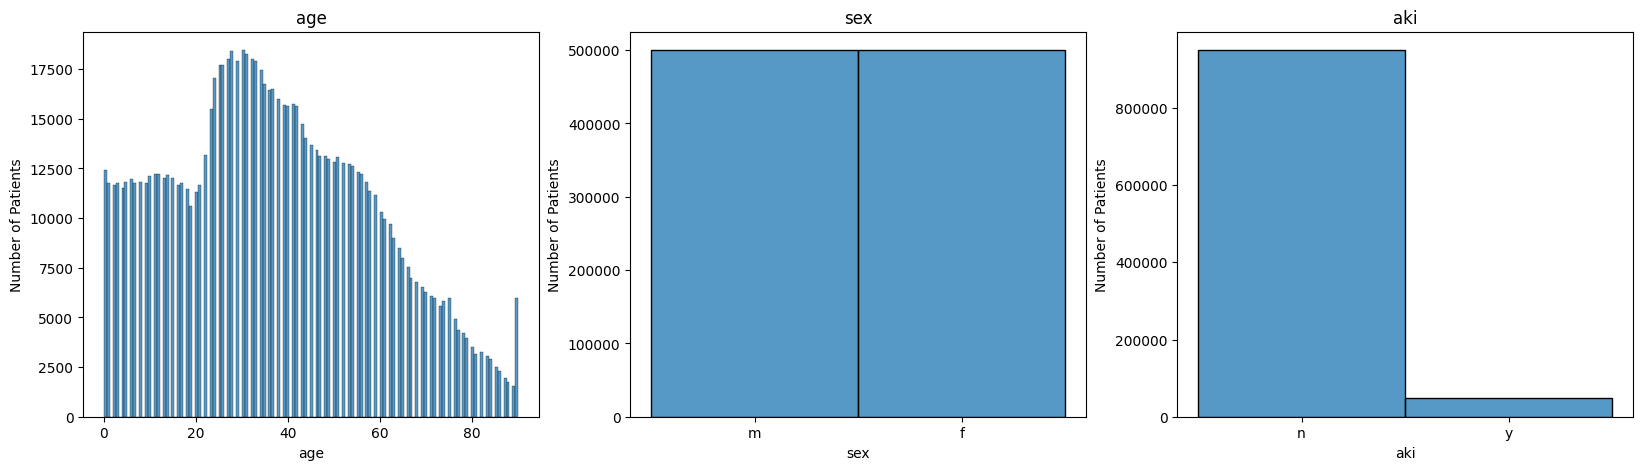

In [3]:
# 1.1 Print some statistics about the data
fig, axes = plt.subplots(figsize=(20,5), ncols=3)

for i,col in enumerate(['age', 'sex', 'aki']):
    # plot the change in creatinine levels of the patient over time
    # train_data[col].plot(ax=axes[0,i])
    sns.histplot(data=train_data, x=col, ax=axes[i])
    axes[i].set_ylabel("Number of Patients")
    axes[i].set_title(f"{col}")

/var/folders/vr/t_3rc9l16fzfc__65h566qhw0000gn/T/ipykernel_24141/1414244892.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


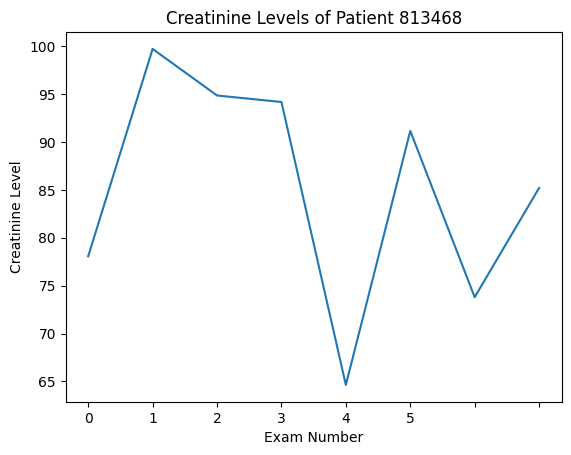

In [25]:
# 1.2 Analysis of Creatinine Levels
import numpy as np

def get_cols(num):
    return [f'creatinine_date_{i}' for i in range(num)]

# Plot Creatinine Levels of a Random Patient
def plot_patient_creatinine(patient):
    fig, ax = plt.subplots()

    # adjust the x-axis labels based on how many tests this patient has taken
    labels = [index for index in range(len(ax.get_xticklabels()))]
    ax.set_xticklabels(labels)

    # plot the change in creatinine levels of the patient over time
    plt.plot(plot_data.iloc[patient])
    plt.xlabel('Exam Number')
    plt.ylabel('Creatinine Level')
    plt.title(f'Creatinine Levels of Patient {patient+1}')

plot_data = train_data.copy()
plot_data.drop(columns=get_cols((get_longest_row(train_data_path)-2)//2), inplace=True)
plot_data.drop(columns=['age', 'sex', 'aki'], inplace=True)
plot_patient_creatinine(np.random.randint(0, plot_data.shape[0]))

In [22]:
# 1.3 Map the aki and sex columns to binary
train_data['aki'] = train_data['aki'].apply(to_binary)
train_data['sex'] = train_data['sex'].apply(to_binary)
train_data

,age,sex,aki,creatinine_result_0,creatinine_result_1,creatinine_result_2,creatinine_result_3,creatinine_result_4,creatinine_result_5,creatinine_result_6,creatinine_result_7,creatinine_result_8
0,35,0,0,105.61,106.07,98.76,NaN,NaN,NaN,NaN,NaN,NaN
1,25,0,0,174.11,210.22,210.52,NaN,NaN,NaN,NaN,NaN,NaN
2,30,0,0,108.12,104.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21,0,0,206.12,214.51,224.88,219.77,NaN,NaN,NaN,NaN,NaN
4,66,0,0,111.43,87.20,80.58,118.58,112.88,117.44,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,50,0,0,78.99,72.17,92.08,88.65,73.26,NaN,NaN,NaN,NaN
999996,64,0,0,118.14,112.45,124.21,107.47,121.36,NaN,NaN,NaN,NaN
999997,47,1,0,87.90,92.81,81.39,79.40,NaN,NaN,NaN,NaN,NaN
999998,62,1,0,106.79,104.93,98.66,73.75,118.14,NaN,NaN,NaN,NaN


In [2]:
# 1.4 Analyse time elapsed between blood tests
def process_patient_data(patient_data, data_type):
    """
        Return the processed patient data
    """
    non_creatinine_columns = 2
    if data_type == 'train':
        non_creatinine_columns += 1

    non_empty_columns = patient_data.count()

    patient = format_patient_data(patient_data, non_empty_columns, non_creatinine_columns)
    
    if data_type == 'train':
        aki_diagnosis = to_binary(patient_data['aki'], 1)
        return (patient, aki_diagnosis)
    else:
        return patient
    
def format_patient_data(patient, non_empty_columns, non_creatinine_columns):
    """
        Return the formatted patient data
    """
    creatinine_test_dates = patient[non_creatinine_columns:non_empty_columns:2]
    creatinine_results = patient[(non_creatinine_columns+1):non_empty_columns:2]

    sex = to_binary(patient['sex'], 'f')
    age = patient['age']

    c1 = creatinine_results.iloc[-1] # most recent test result

    rv1 = creatinine_results.min() # lowest value 
    rv2 = creatinine_results.median() # median value

    previous_test_elapsed = creatinine_test_dates.iloc[-1] - creatinine_test_dates.iloc[-2] # second most recent test result

    rv_ratio = c1 / rv2
    if previous_test_elapsed.days > 7:
        rv_ratio = c1 / rv1

    (elapsed_time, creatinine_change) = get_change_in_last_two_days(creatinine_test_dates, creatinine_results)
    print(f"Creatinine change in {elapsed_time} = {creatinine_change}")

    return [sex, age, c1, rv1, rv2, rv_ratio, creatinine_change]
    
def get_change_in_last_two_days(test_dates, test_results):
    """
        Return the change in creatinine levels in the last two days
    """
    elapsed_time = pd.Timedelta(0)
    useable_test_results = [test_results.iloc[-1]]
    creatinine_change = 0

    for test_num in range(len(test_dates)-2, -1, -1):
        elapsed_time += pd.Timedelta(test_dates.iloc[test_num+1] - test_dates.iloc[test_num])
        if elapsed_time <= pd.Timedelta(days=2):
            useable_test_results.append(test_results.iloc[test_num])
        else:
            test_num = -1
    
    creatinine_change = useable_test_results[0] - min(useable_test_results[1:])
    return (elapsed_time, creatinine_change)


(patient, aki) = process_patient_data(train_data.iloc[3], 'train')
# train_data
patient, aki

Creatinine change in 80 days 15:15:00 = 5.260000000000019


([0, 21, 219.77, 206.12, 217.14, 1.0121120014737037, 5.260000000000019], 0)

In [97]:
# 1.5 Calculate minimum, average and maximum creatinine levels for each patient
creatine_columns = ['creatinine_result_0', 'creatinine_result_1', 'creatinine_result_2', 'creatinine_result_3', 'creatinine_result_4', 
                    'creatinine_result_5', 'creatinine_result_6', 'creatinine_result_7', 'creatinine_result_8',]
creatinine_stats = {}
creatinine_stats['min_creatinine'] = train_data.loc[:][creatine_columns].min(axis=1)
creatinine_stats['avg_creatinine'] = train_data.loc[:][creatine_columns].median(axis=1)
creatinine_stats['max_creatinine'] = train_data.loc[:][creatine_columns].max(axis=1)

creatine_ds = pd.DataFrame(creatinine_stats)
train_data = pd.concat([train_data, creatine_ds], axis=1)
train_data

,age,sex,aki,creatinine_result_0,creatinine_result_1,creatinine_result_2,creatinine_result_3,creatinine_result_4,creatinine_result_5,creatinine_result_6,...,elapsed_exam_1-2,elapsed_exam_2-3,elapsed_exam_3-4,elapsed_exam_4-5,elapsed_exam_5-6,elapsed_exam_6-7,elapsed_exam_7-8,min_creatinine,avg_creatinine,max_creatinine
0,35,0,0,105.61,106.07,98.76,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,98.76,103.480000,106.07
1,25,0,0,174.11,210.22,210.52,NaN,NaN,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,174.11,198.283333,210.52
2,30,0,0,108.12,104.41,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.41,106.265000,108.12
3,21,0,0,206.12,214.51,224.88,219.77,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,206.12,216.320000,224.88
4,66,0,0,111.43,87.20,80.58,118.58,112.88,117.44,NaN,...,67.0,0.0,2.0,1.0,NaN,NaN,NaN,80.58,104.685000,118.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,50,0,0,78.99,72.17,92.08,88.65,73.26,NaN,NaN,...,2.0,214.0,0.0,NaN,NaN,NaN,NaN,72.17,81.030000,92.08
999996,64,0,0,118.14,112.45,124.21,107.47,121.36,NaN,NaN,...,0.0,1.0,2.0,NaN,NaN,NaN,NaN,107.47,116.726000,124.21
999997,47,1,0,87.90,92.81,81.39,79.40,NaN,NaN,NaN,...,253.0,0.0,NaN,NaN,NaN,NaN,NaN,79.40,85.375000,92.81
999998,62,1,0,106.79,104.93,98.66,73.75,118.14,NaN,NaN,...,128.0,0.0,0.0,NaN,NaN,NaN,NaN,73.75,100.454000,118.14


######

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

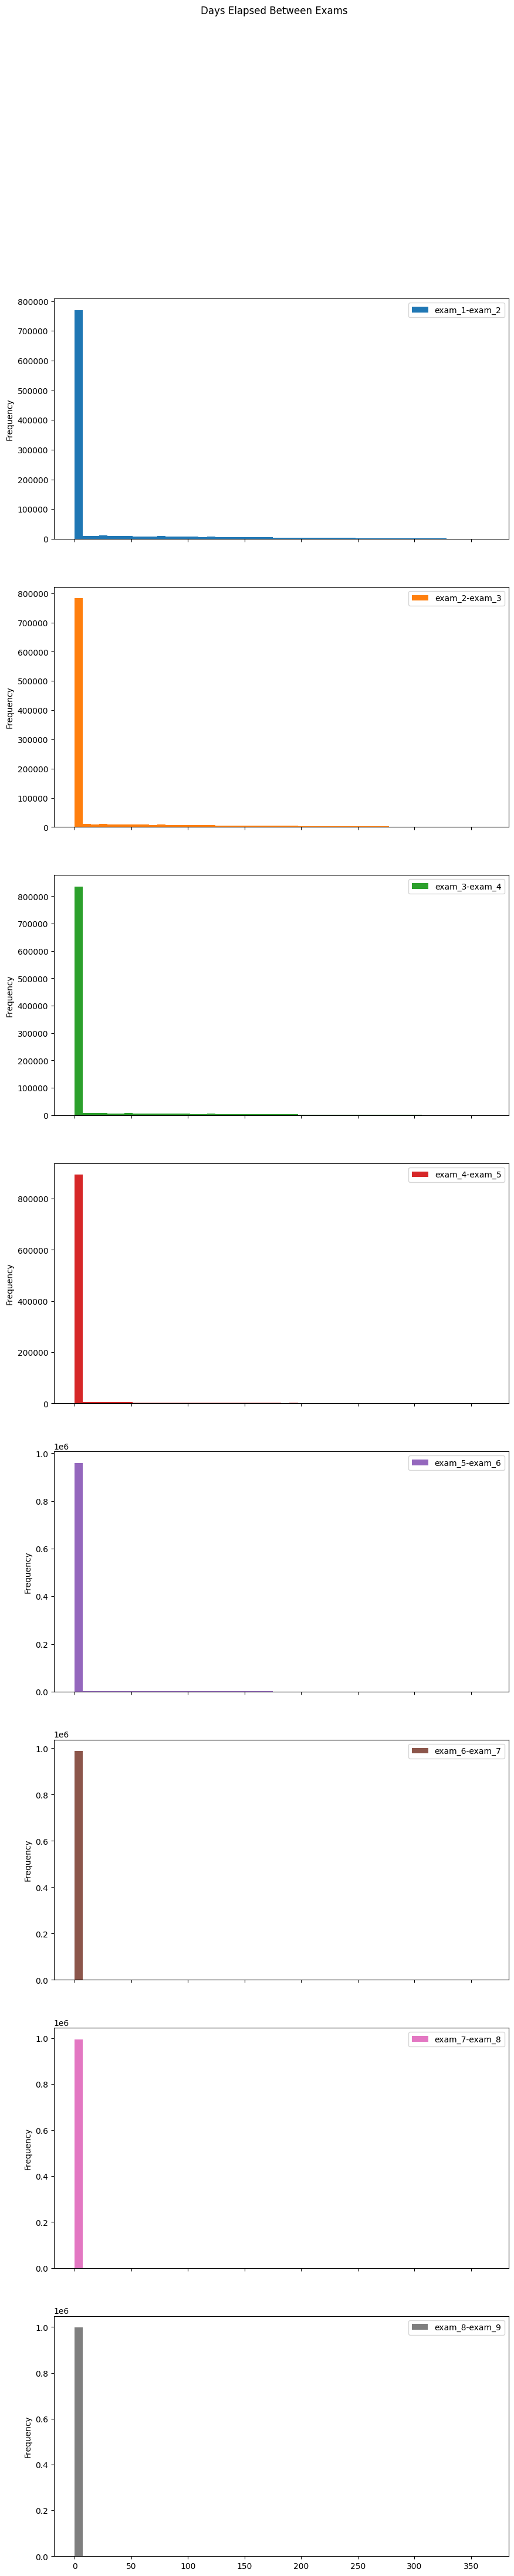

In [27]:
elapsed_days_dataset.plot(kind='hist', subplots=True, figsize=(10,50), bins=50, title='Days Elapsed Between Exams')